In [1]:
using Pkg

In [2]:
Pkg.add("Clustering")

In [4]:
Pkg.add("RDatasets")

In [5]:
using Clustering, RDatasets

In [6]:
df = dataset("cluster", "xclara")

,V1,V2
,Float64,Float64
1,2.07234,-3.24169
2,17.9367,15.7848
3,1.08358,7.31918
4,11.1207,14.4068
5,23.7115,2.55773
6,24.1699,32.0248
7,21.6658,4.89285
8,4.69368,12.3422
9,19.2119,-1.12137


In [7]:
using Plots

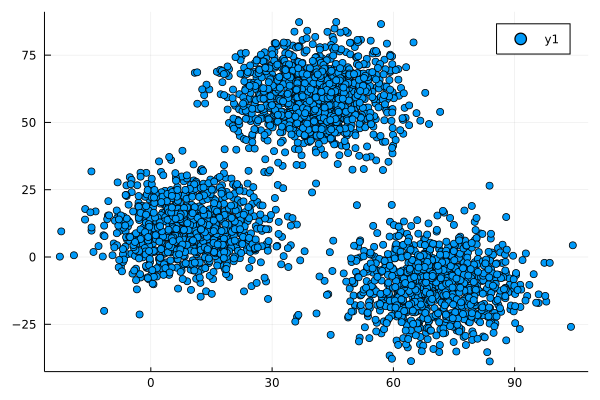

In [8]:
scatter(df.V1, df.V2)

In [9]:
#=
Step 1 - Initialization
Step 2 - Cluster Assignment
Step 3 - Move the centroid
=#

In [10]:
data = copy(convert(Array{Float64}, df)')  # taking transpose of data

2×3000 Matrix{Float64}:
  2.07234  17.9367  1.08358  11.1207  …   64.4653   90.7228   64.8798
 -3.24169  15.7848  7.31918  14.4068     -10.5014  -12.2558  -24.8773

In [11]:
seeds = initseeds(:rand, data, 3)

3-element Vector{Int64}:
 456
 634
 341

In [12]:
data_kmeans = kmeans(data, 3)

KmeansResult{Matrix{Float64}, Float64, Int64}([69.92418447478987 40.68362784160133 9.478045899766407; -10.119641194361344 59.715892741514416 10.686052004816457], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [248.82648673599076, 97.54633145402863, 81.80297892989307, 16.542030748810703, 268.662273841995, 671.1927708671267, 182.10199403461115, 25.632845601907206, 234.1632302622802, 256.38180079050915  …  466.72939280326045, 9.368284820777262, 133.564288058049, 226.74875462945602, 262.74319403555455, 260.77455537845526, 225.04340330959894, 29.944910600701405, 437.14658504774525, 243.23500685878025], [952, 1149, 899], [952, 1149, 899], 611605.8806933899, 4, true)

In [13]:
nclusters(data_kmeans)

3

In [14]:
counts(data_kmeans)

3-element Vector{Int64}:
  952
 1149
  899

In [16]:
df.group = assignments(data_kmeans)

3000-element Vector{Int64}:
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [17]:
df

,V1,V2,group
,Float64,Float64,Int64
1,2.07234,-3.24169,3
2,17.9367,15.7848,3
3,1.08358,7.31918,3
4,11.1207,14.4068,3
5,23.7115,2.55773,3
6,24.1699,32.0248,3
7,21.6658,4.89285,3
8,4.69368,12.3422,3
9,19.2119,-1.12137,3


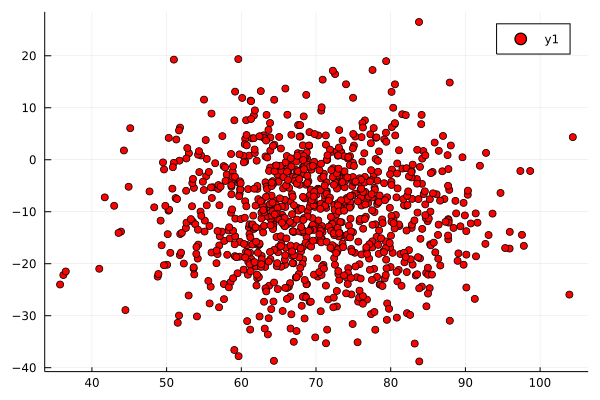

┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:952.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:952.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:952.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102


In [18]:
scatter(df[df.group .== 1, :V1],df[df.group .== 1, :V2], markercolor=[:red])

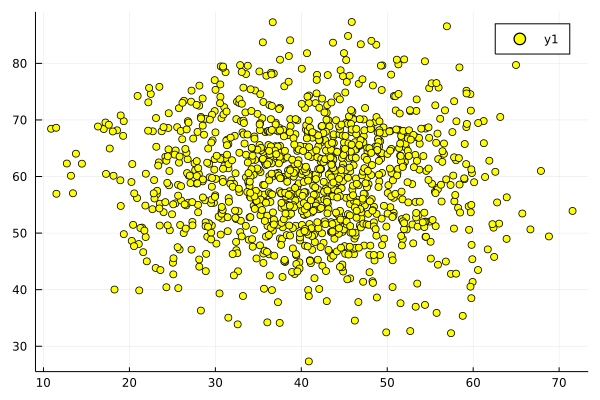

┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:1149.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:1149.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:1149.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102


In [20]:
scatter(df[df.group .== 2, :V1],df[df.group .== 2, :V2], markercolor=[:yellow])

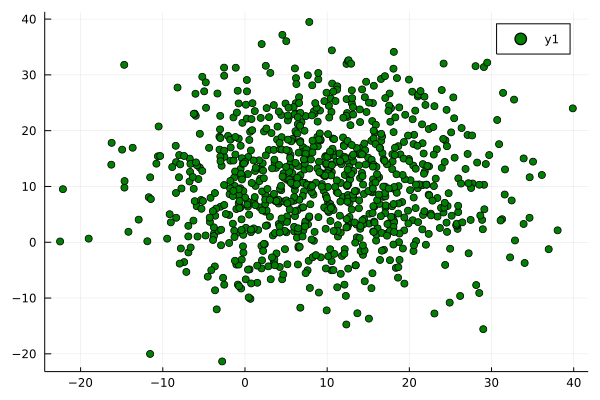

┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:899.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:899.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:899.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102


In [21]:
scatter(df[df.group .== 3, :V1],df[df.group .== 3, :V2], markercolor=[:green])

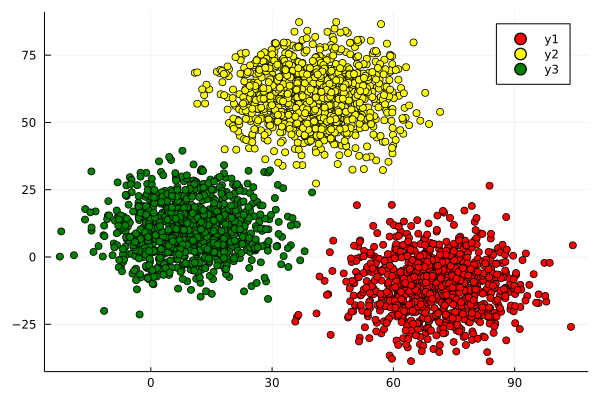

┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:952.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:952.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:1149.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:1149.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:899.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:899.
└ @ Plots C:\Users\deven\.julia\packages\Plots\vVVub\src\utils.jl:102
┌ Warnin

In [22]:
scatter(df[df.group .== 1, :V1],df[df.group .== 1, :V2], markercolor=[:red])
scatter!(df[df.group .== 2, :V1],df[df.group .== 2, :V2], markercolor=[:yellow])
scatter!(df[df.group .== 3, :V1],df[df.group .== 3, :V2], markercolor=[:green])